In [24]:
import pandas as pd
file=pd.read_csv(r"C:\Users\Hp\Downloads\website_performance.csv")
data=file.copy()
### cleaning data
print(data.head())
data.describe()
data.dtypes

        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-03-01        3.239983     0.480903         0.050514
3  2023-04-01        5.954509     0.473572         0.057151
4  2023-05-01        9.872398     0.542407         0.089525


Month               object
Page_Load_Time     float64
Bounce_Rate        float64
Conversion_Rate    float64
dtype: object

In [25]:
data.shape

(12, 4)

In [27]:
print(data.isnull().sum())
data.dropna(inplace=True)

Month              0
Page_Load_Time     0
Bounce_Rate        0
Conversion_Rate    0
dtype: int64


In [28]:
data.shape

(12, 4)

In [29]:
print(data.duplicated().sum())

0


In [34]:
## remove outliers
import numpy as np
import pandas as pd
def remove_outliers(data,column, k=1.5):   ## k standard value=1.5  ## using iqr

    q1 = np.percentile(data[column], 25)
    q3 = np.percentile(data[column], 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    cond1=data[column] >= lower_bound
    cond2=(data[column] <= upper_bound)
    return data[cond1 & cond2]
cleaned_data=remove_outliers(data,'Page_Load_Time',k=1.5)
print(cleaned_data)

         Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0   2023-01-01        5.106652     0.514345         0.047375
1   2023-02-01        7.828199     0.317157         0.062764
2   2023-03-01        3.239983     0.480903         0.050514
3   2023-04-01        5.954509     0.473572         0.057151
4   2023-05-01        9.872398     0.542407         0.089525
5   2023-06-01        7.333456     0.440715         0.048687
6   2023-07-01        3.372264     0.390081         0.048440
7   2023-08-01        7.115272     0.489165         0.038263
8   2023-09-01        8.384957     0.301692         0.063365
9   2023-10-01        2.468395     0.566843         0.065971
10  2023-11-01        4.429745     0.526560         0.065786
11  2023-12-01        5.289363     0.388364         0.082828


In [37]:
print(data.columns)

Index(['Month', 'Page_Load_Time', 'Bounce_Rate', 'Conversion_Rate'], dtype='object')


In [32]:
data.shape

(12, 4)

In [46]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read data from CSV file into a DataFrame
website_performance = pd.read_csv(r"C:\Users\Hp\Downloads\website_performance.csv")
print(website_performance.head(10))

        Month  Page_Load_Time  Bounce_Rate  Conversion_Rate
0  2023-01-01        5.106652     0.514345         0.047375
1  2023-02-01        7.828199     0.317157         0.062764
2  2023-03-01        3.239983     0.480903         0.050514
3  2023-04-01        5.954509     0.473572         0.057151
4  2023-05-01        9.872398     0.542407         0.089525
5  2023-06-01        7.333456     0.440715         0.048687
6  2023-07-01        3.372264     0.390081         0.048440
7  2023-08-01        7.115272     0.489165         0.038263
8  2023-09-01        8.384957     0.301692         0.063365
9  2023-10-01        2.468395     0.566843         0.065971


Descriptive Statistics for Website Performance Metrics:
       Page_Load_Time  Bounce_Rate  Conversion_Rate
count       12.000000    12.000000        12.000000
mean         5.866266     0.452650         0.060056
std          2.288288     0.086482         0.014993
min          2.468395     0.301692         0.038263
25%          4.165375     0.389651         0.048626
50%          5.621936     0.477238         0.059957
75%          7.457142     0.517399         0.065832
max          9.872398     0.566843         0.089525


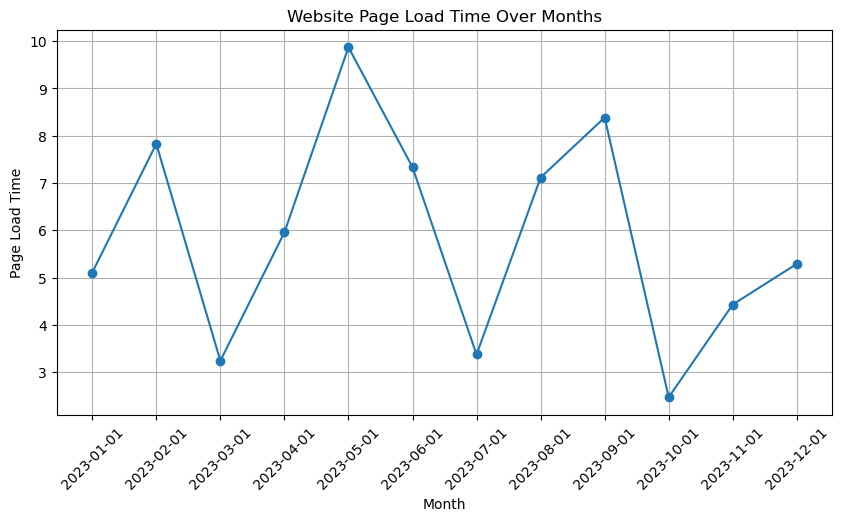

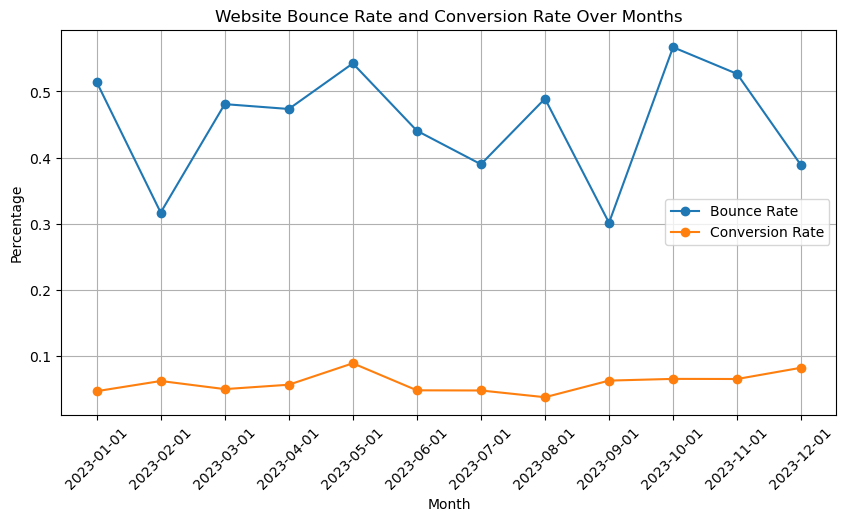

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read data from CSV file into a DataFrame
website_performance = pd.read_csv(r"C:\Users\Hp\Downloads\website_performance.csv")

# Step 2: Perform basic descriptive statistics
print("Descriptive Statistics for Website Performance Metrics:")
print(website_performance.describe())

# Step 3: Visualize the data
# Plotting page load time over months
plt.figure(figsize=(10, 5))
plt.plot(website_performance['Month'], website_performance['Page_Load_Time'], marker='o')
plt.xlabel('Month')
plt.ylabel('Page Load Time')
plt.title('Website Page Load Time Over Months')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
plt.show()

# Plotting bounce rate and conversion rate over months
plt.figure(figsize=(10, 5))
plt.plot(website_performance['Month'], website_performance['Bounce_Rate'], marker='o', label='Bounce Rate')
plt.plot(website_performance['Month'], website_performance['Conversion_Rate'], marker='o', label='Conversion Rate')
plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Website Bounce Rate and Conversion Rate Over Months')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


###  To reduce bounce rate and improve the conversion rate

In [53]:
pip install pandas dash plotly

     ---------------------------------------- 10.4/10.4 MB 5.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## visualization dashboard to monitor website performance 

In [57]:
import pandas as pd
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
from datetime import datetime


website_performance = pd.read_csv(r"C:\Users\Hp\Downloads\website_performance.csv")


app = dash.Dash(__name__)

# Layout of the dashboard
app.layout = html.Div([
    dcc.Graph(id='page-load-time-graph'),
    dcc.Graph(id='bounce-rate-conversion-rate-graph'),
    dcc.Interval(
        id='interval-component',
        interval=60*1000,  # Update data every minute
        n_intervals=0
    )
])

# To update the graphs
@app.callback(
    Output('page-load-time-graph', 'figure'),
    Output('bounce-rate-conversion-rate-graph', 'figure'),
    Input('interval-component', 'n_intervals')
)
def update_graphs(n):
    
    website_performance = pd.read_csv(r"C:\Users\Hp\Downloads\website_performance.csv")

    # graph for Page Load Time
    page_load_time_graph = px.line(
        website_performance, x='Month', y='Page_Load_Time',
        title='Website Page Load Time Over Months',
        labels={'Month': 'Month', 'Page_Load_Time': 'Page Load Time'}
    )

    # graph for Bounce Rate and Conversion Rate
    bounce_conversion_graph = px.line(
        website_performance, x='Month', y=['Bounce_Rate', 'Conversion_Rate'],
        title='Website Bounce Rate and Conversion Rate Over Months',
        labels={'Month': 'Month', 'value': 'Percentage'},
        line_shape='linear'
    )

    
    page_load_time_graph.update_xaxes(type='category')
    bounce_conversion_graph.update_xaxes(type='category')

    return page_load_time_graph, bounce_conversion_graph

if __name__ == '__main__':
    
    app.run_server(debug=True)